In [7]:
from scipy.stats import sem
import numpy as np
import matplotlib.pyplot as plt

In [64]:
input_string = """
#p=[5,10,30,50],s=int(0.10p(p-1)/2)

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.95131380815497,5.0623385870560105,4.95201078217325,5.030091025086838,4.941099462600754,4.914599514627752,5.024546674098507,4.922976452090311,5.124992667085891,4.8246844362833645
5.000321163011461,5.0040879539169305,5.0012977241798575,5.000331854935593,5.004809881838279,5.000770451738113,5.000490978658369,5.001429984014788,5.00000184633539,5.000016178277672

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.9513141900658155,5.062339791386956,4.952010573636363,5.030090612725706,4.941099336791689,4.914599499588084,5.024548613722538,4.9229779629894495,5.124992845501045,4.824661291561791
5.000291601666522,5.004131926524134,5.0013276473453105,5.000337939296979,5.0047599053444465,5.00076358852662,5.000558674998263,5.001390256680408,5.000000387978181,5.00004738990903

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.951313886633618,5.062339791386956,4.952010573636361,5.030089287860083,4.941100303998655,4.9146076080757615,5.024549318311573,4.922975321878507,5.124992845501045,4.824653637943005
5.000326593990839,5.004131926524134,5.0013276473453105,5.00038137542518,5.004899116864186,5.000612862785614,5.000424360239398,5.001549195164148,5.000000387978181,5.000090425300182


1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.923733921222412,10.036298653972807,10.121912332206914,9.849008719665552,10.046480692743682,9.937782913980529,10.17972362622606,9.902139690145301,10.163085847290997,10.27007412033411
10.011470370620973,10.001759297626514,10.00460122059143,10.007254508253371,10.00272664328451,10.00232936496159,10.028868089730821,10.004395975573672,10.00619594323087,10.001509589013425

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.92392092276122,10.036282320366572,10.12260929607774,9.848998516304752,10.046449128696707,9.9377685112276,10.17786431059958,9.902025033730764,10.163399997128574,10.270111630246799
10.011925119032092,10.00163002164552,10.005586105190972,10.006885789214316,10.002449571072132,10.00168924158804,10.02592368922992,10.007385932727178,10.006331984874556,10.002000586524602

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.923764956636795,10.036281558950918,10.122619454865497,9.849001944146941,10.046459299728774,9.937738042983762,10.177729905096822,9.901047910277917,10.163356658170219,10.270110143346173
10.011567336598336,10.00160075308317,10.005607555690805,10.00696563642676,10.002627216805156,10.001653535659786,10.025750760043948,10.006106152096534,10.006444013348725,10.001518529804905

0.9069767441860465,1.0,1.0,0.9069767441860465,0.8837209302325582,0.8604651162790697,1.0,0.9069767441860465,0.9302325581395349,0.9767441860465116
0.22,0.0,0.0,0.20408163265306123,0.19148936170212766,0.22916666666666666,0.0,0.3389830508474576,0.09090909090909091,0.06666666666666667
11,0,0,10,13,16,0,22,5,3
0.02806122448979592,0.0,0.0,0.025510204081632654,0.02295918367346939,0.02806122448979592,0.0,0.05102040816326531,0.01020408163265306,0.007653061224489796
33.978964359472926,29.948402857286656,30.52497853115514,30.986836394164367,34.29411496385143,53.16155347479637,29.84127382587427,32.864819076087954,31.150254827919706,30.44058869817923
34.007477268157146,30.376532317045864,30.52250268190625,31.083803096819295,34.251560335153336,52.40657204131427,30.4758225346728,32.694435372229925,31.059335851988667,30.55113509801145

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.022727272727272728,0.0,0.0,0.0,0.022727272727272728
0,0,0,0,0,1,0,0,0,1
0.0,0.0,0.0,0.0,0.0,0.002551020408163265,0.0,0.0,0.0,0.002551020408163265
31.59985423402678,29.914016745304277,30.344383086126822,30.181263391726173,30.26956501620358,31.18286363605437,29.7957788683346,31.018466753166095,30.25557523779228,30.10636785872865
31.625193941834794,30.33697679932654,30.3250797900813,30.20321031355978,30.232400880790124,31.281911563803977,30.432346220020037,30.7573471043942,30.12561944724408,30.206015105591145

0.9767441860465116,1.0,0.9069767441860465,0.9534883720930233,0.9534883720930233,0.8604651162790697,1.0,0.8837209302325582,0.9534883720930233,0.9767441860465116
0.06666666666666667,0.0,0.13333333333333333,0.1276595744680851,0.046511627906976744,0.27450980392156865,0.0,0.32142857142857145,0.08888888888888889,0.10638297872340426
3,0,9,6,3,16,0,21,5,5
0.007653061224489796,0.0,0.015306122448979591,0.015306122448979591,0.00510204081632653,0.03571428571428571,0.0,0.04591836734693878,0.01020408163265306,0.012755102040816327
32.97576074994566,29.96623515925707,36.5671511365902,30.76694650376536,30.76678377223676,33.24964407837707,29.8074362137174,31.86887260842298,30.59358413212631,30.254034967563044
32.879621796899784,30.399198302874403,36.26022828197124,30.748913892110934,30.93024294682415,33.27088914416372,30.443424038703615,31.54373756670087,30.45935527484719,30.409306349408677


0.9344262295081968,0.9344262295081968,0.9590163934426229,0.9262295081967213,0.9754098360655737,0.8688524590163934,0.9016393442622951,0.9180327868852459,0.8934426229508197,0.9016393442622951
0.11627906976744186,0.19148936170212766,0.13333333333333333,0.19858156028368795,0.16783216783216784,0.3652694610778443,0.19708029197080293,0.24324324324324326,0.28289473684210525,0.2857142857142857
20,35,22,35,26,73,33,44,54,53
0.013599274705349048,0.024478694469628286,0.016319129646418858,0.025385312783318223,0.021758839528558477,0.05530371713508613,0.024478694469628286,0.032638259292837715,0.038984587488667274,0.03989120580235721
70.29034602543892,500.27447877013424,116.82067180474785,171.0292613004976,225.13861693500618,282.0332352180567,79.4079328071146,107.92857221899861,1528.6466149555363,391.30639375085497
70.65148637843923,515.2994530234314,113.24332120237807,178.38142876900184,230.94305975403088,278.6598710230039,80.50052277829076,109.226388106659,1547.5930666482434,398.68068461494875

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.008130081300813009,0.008130081300813009,0.024,0.008130081300813009,0.0,0.008130081300813009,0.008130081300813009,0.0,0.008130081300813009,0.0
1,1,3,1,0,1,1,0,1,0
0.0009066183136899365,0.0009066183136899365,0.0027198549410698096,0.0009066183136899365,0.0,0.0009066183136899365,0.0009066183136899365,0.0,0.0009066183136899365,0.0
58.25816348501575,73.0073178962593,66.80191013104951,54.019872130807954,54.40091219746914,65.61172218583091,61.54518952031327,53.58933532200103,108.77395148561844,60.05141431204186
58.395521629423875,73.87055216200332,64.97557079839314,54.50072826767742,55.05823042747412,65.043730375376,61.5116600265818,53.99290428858893,110.54939610531378,60.82200897931603

0.9508196721311475,0.8032786885245902,0.9180327868852459,0.9180327868852459,0.9918032786885246,0.8934426229508197,0.9672131147540983,1.0,0.8934426229508197,0.8852459016393442
0.2564102564102564,0.5504587155963303,0.30434782608695654,0.3,0.047244094488188976,0.3057324840764331,0.09230769230769231,0.0,0.2635135135135135,0.40331491712707185
43,136,54,52,6,57,13,0,48,79
0.03626473254759746,0.10879419764279238,0.044424297370806894,0.043517679057116954,0.005439709882139619,0.043517679057116954,0.010879419764279238,0.0,0.03535811423390753,0.06618313689936536
115.2108044700256,406.24751843505027,90.95640575430627,58.78556309374272,55.51895941453874,194.90643559762387,59.09852659091681,53.42325300348036,258.60595778856157,131.3358740155576
115.04565449350147,416.4078256497559,88.6196507511003,59.243793007458684,56.15260882587878,190.4068047861071,58.667832793441164,53.76088731159941,265.17978576494625,133.88059175838217


"""

In [90]:
input_string = """
# p =5, s = 0.50 p * (p - 1) / 2

0.8, 1.0, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0
0.2, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
1, 0, 0, 2, 0, 0, 0, 0, 0, 0
0.2, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
5.233372394696963, 5.112537388126168, 5.1994875448718325, 5.164080388910923, 5.16884092705651, 5.069317642758552, 4.986365234142419, 4.9756885582650945, 5.0418902591410975, 5.067953256068349
5.111633354795572, 5.009756337909544, 5.013028324640361, 5.0600827445157845, 5.005889992148235, 5.010846810637883, 5.024889780624927, 5.030953397487192, 5.016975630163057, 5.002801336318829

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
5.13021699815147, 5.114737233215036, 5.198588945220075, 5.1170620188510885, 5.168814674814558, 5.070589114176313, 4.98587719122146, 4.976893766399844, 5.04225405636696, 5.072618054065464
5.008811819725422, 5.0130655614832245, 5.011252868143082, 5.001952887672813, 5.0060187963098794, 5.011980497509333, 5.024038962139711, 5.028903534478706, 5.017368127703335, 5.006034545931554

0.6, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 1.0
0.25, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0
2, 0, 2, 0, 0, 0, 0, 2, 0, 0
0.2, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0
5.260041752379222, 5.111290684397866, 5.282493420519371, 5.117062193437733, 5.168813838375013, 5.070590830467878, 4.985877191221463, 5.091263160127865, 5.041728473979711, 5.072618054065444
5.107740702412647, 5.008304326805104, 5.105086496678114, 5.001931415317594, 5.006052307031393, 5.0119876186656, 5.024038962139711, 5.120008014834797, 5.013707552085355, 5.006034545931538

1.0, 1.0, 0.9545454545454546, 0.9545454545454546, 0.9545454545454546, 1.0, 1.0, 0.8636363636363636, 1.0, 1.0
0.0, 0.0, 0.125, 0.16, 0.045454545454545456, 0.0, 0.0, 0.09523809523809523, 0.0, 0.0
0, 0, 3, 4, 1, 0, 0, 3, 0, 0
0.0, 0.0, 0.13043478260869565, 0.17391304347826086, 0.043478260869565216, 0.0, 0.0, 0.08695652173913043, 0.0, 0.0
10.029263361086056, 10.0815687280209, 10.491647737118265, 10.517437813923836, 10.123791480623906, 9.969326797476356, 9.85587774444832, 13.463204765265928, 9.94921530525828, 10.411411493182996
10.191718189008549, 10.243703232033212, 10.369485792049637, 10.472520285340142, 10.155480643617437, 10.061381376878703, 10.100859511485663, 13.292916697232858, 10.098899778148631, 10.302524518949085


1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
10.02828906503344, 9.964736137819068, 10.324570377157015, 10.453906164118841, 10.018904885777882, 10.022941211833208, 9.842699555079834, 12.34323921118202, 9.950777589223195, 10.542583866613699
10.19560186029927, 10.122703730872406, 10.155276264681422, 10.372864782749852, 10.098418762949656, 10.150654642002275, 10.088675874037648, 12.233056664647254, 10.102037203806328, 10.419896671464413

0.8636363636363636, 0.6818181818181818, 0.8181818181818182, 0.9090909090909091, 0.9090909090909091, 1.0, 1.0, 0.6818181818181818, 0.8636363636363636, 1.0
0.20833333333333334, 0.34782608695652173, 0.35714285714285715, 0.25925925925925924, 0.09090909090909091, 0.0, 0.0, 0.16666666666666666, 0.13636363636363635, 0.0
7, 12, 11, 7, 3, 0, 0, 9, 5, 0
0.21739130434782608, 0.34782608695652173, 0.43478260869565216, 0.30434782608695654, 0.08695652173913043, 0.0, 0.0, 0.13043478260869565, 0.13043478260869565, 0.0
13.006450032016623, 14.093791018410524, 11.30651923745617, 10.42757598698647, 10.203352045580864, 9.959741213208325, 9.842699555079834, 17.528622444840753, 10.736046679745712, 10.53425867026364
13.181616395913004, 14.27492781487338, 11.242214639104727, 10.449959544677078, 10.31511734838255, 10.057104849211314, 10.088675874037644, 17.662179377101978, 10.864013144439909, 10.399525529072289


0.7880184331797235, 0.7880184331797235, 0.9170506912442397, 0.815668202764977, 0.5852534562211982, 0.7880184331797235, 0.6866359447004609, 0.9308755760368663, 0.9216589861751152, 0.9953917050691244
0.3076923076923077, 0.3076923076923077, 0.204, 0.33955223880597013, 0.44782608695652176, 0.316, 0.3165137614678899, 0.15481171548117154, 0.15611814345991562, 0.02262443438914027
117, 121, 64, 128, 186, 119, 135, 47, 51, 6
0.3486238532110092, 0.3486238532110092, 0.23394495412844038, 0.41743119266055045, 0.4724770642201835, 0.3623853211009174, 0.3165137614678899, 0.16972477064220184, 0.16972477064220184, 0.022935779816513763
744647.2667839382, 172620.25128038437, 105012.7806642638, 72781.07248247691, 1535894.4594054653, 50025.05304738537, 2284386.8363520587, 2356.7385009451805, 2224.2497665233445, 351.4503263082135
736981.7723838219, 164476.6199913849, 100801.44869777955, 73372.33153196778, 1431758.45191272, 44277.21096587617, 2182849.773137845, 2348.3725985282317, 2233.962912419966, 318.5758691744773


0.9953917050691244, 1.0, 1.0, 1.0, 0.9953917050691244, 1.0, 0.9953917050691244, 1.0, 1.0, 0.9953917050691244
0.0, 0.0045871559633027525, 0.02252252252252252, 0.0091324200913242, 0.004608294930875576, 0.013636363636363636, 0.004608294930875576, 0.0, 0.0045871559633027525, 0.0136986301369863
1, 1, 5, 2, 2, 3, 2, 0, 1, 4
0.0, 0.0045871559633027525, 0.022935779816513763, 0.009174311926605505, 0.0045871559633027525, 0.013761467889908258, 0.0045871559633027525, 0.0, 0.0045871559633027525, 0.013761467889908258
10042.569220285277, 13719.02768398142, 4389.181232567475, 3404.0461722032514, 52022.127650438626, 1140.068859591043, 45063.04060853748, 409.80078938004465, 418.5239309677089, 447.2119377906749
9914.95555025765, 13130.947428478396, 4260.1595837266705, 3415.3503891995642, 48533.185893274094, 1021.9741147200149, 43106.82257472385, 394.4756325966594, 417.91521146715905, 405.4108071201073


0.6267281105990783, 0.6497695852534562, 0.6589861751152074, 0.7419354838709677, 0.5852534562211982, 0.6451612903225806, 0.6036866359447005, 0.543778801843318, 0.728110599078341, 0.6820276497695853
0.4380165289256198, 0.4555984555984556, 0.43478260869565216, 0.3206751054852321, 0.4899598393574297, 0.44881889763779526, 0.4738955823293173, 0.5042016806722689, 0.4377224199288256, 0.4618181818181818
175, 182, 174, 125, 202, 177, 192, 209, 171, 186
0.48623853211009177, 0.5412844036697247, 0.5045871559633027, 0.3486238532110092, 0.5596330275229358, 0.5229357798165137, 0.5412844036697247, 0.5504587155963303, 0.5642201834862385, 0.5825688073394495
63518.67077778577, 668589.1360805612, 167266.9645239359, 36131.292614510996, 1570763.5333031944, 38493.8814163982, 557869.5101815842, 64960.65095757147, 43629.8988067994, 12134.066041037542
458104.1371457738, 638991.3966256185, 161504.63626228602, 36480.197257448905, 1464612.2434727487, 34533.640407028775, 532820.8994873713, 65373.73449818057, 43881.174130831525, 11053.349320131047

0.26143790849673204, 0.1437908496732026, 0.032679738562091505, 0.31699346405228757, 0.1830065359477124, 0.11437908496732026, 0.11437908496732026, 0.016339869281045753, 0.12254901960784313, 0.10130718954248366
0.43661971830985913, 0.4666666666666667, 0.6363636363636364, 0.4049079754601227, 0.44554455445544555, 0.48905109489051096, 0.5205479452054794, 0.5, 0.4863013698630137, 0.4918032786885246
568, 600, 620, 544, 581, 604, 611, 611, 602, 608
0.20228384991843393, 0.12561174551386622, 0.057096247960848286, 0.21533442088091354, 0.1468189233278956, 0.10929853181076672, 0.12398042414355628, 0.01631321370309951, 0.11582381729200653, 0.09787928221859707
231290589.91967118, 2146177773.318103, 185188007585.6859, 116273681.58100562, 599146771.6324779, 265026282.52510235, 1987040596.2466588, 151432427483.31058, 4896430304.952827, 26505133653.951546
235875291.8424024, 1964534932.2166219, 174415344852.35065, 123443696.46140727, 650887116.1472756, 267465318.13998014, 2005356057.9568303, 149261051156.504, 5346104433.78984, 26213713823.079857


0.9362745098039216, 0.8316993464052288, 0.33986928104575165, 0.9771241830065359, 0.9264705882352942, 0.9019607843137255, 0.5816993464052288, 0.31862745098039214, 0.7026143790849673, 0.3431372549019608
0.14605067064083457, 0.1984251968503937, 0.5336322869955157, 0.08702290076335878, 0.11682242990654206, 0.17117117117117117, 0.4105960264900662, 0.5486111111111112, 0.31962025316455694, 0.5161290322580645
132, 220, 619, 69, 118, 165, 490, 621, 375, 593
0.1598694942903752, 0.20554649265905384, 0.38825448613376834, 0.0929853181076672, 0.12234910277324633, 0.1859706362153344, 0.40456769983686786, 0.3866231647634584, 0.3295269168026101, 0.36541598694942906
14489992.904798886, 118217420.14381099, 356632190401.80676, 728266.8484890833, 7980956.280517558, 91403946.64906073, 272448258.85540134, 4814298203449.468, 833192616.4090421, 42872774988.992645
15034759.868823733, 107969744.4306004, 5904141082.4951, 773177.2627279824, 8694238.916801646, 91631957.83266719, 274975382.6259388, 45438755056.424, 909934408.0548164, 42389566903.1171


0.6797385620915033, 0.5016339869281046, 0.5196078431372549, 0.6781045751633987, 0.5049019607843137, 0.6535947712418301, 0.6078431372549019, 0.4526143790849673, 0.5800653594771242, 0.6650326797385621
0.4363143631436314, 0.4900332225913621, 0.49038461538461536, 0.43460490463215257, 0.5141509433962265, 0.46524064171123, 0.47531734837799716, 0.5026929982046678, 0.4892086330935252, 0.479539641943734
507, 586, 590, 509, 610, 552, 564, 607, 589, 568
0.5252854812398042, 0.4812398042414356, 0.499184339314845, 0.5203915171288744, 0.533442088091354, 0.567699836867863, 0.5497553017944535, 0.4567699836867863, 0.5546492659053833, 0.6117455138662317
59892524.579433285, 82264465.327783, 10804260905.918509, 21078554.492404766, 16598007.657895505, 29893034.995670345, 4434485.329504685, 4426850135.872799, 260179216.7070202, 642431960.6569028
60925402.35254151, 75969905.82245347, 10175137706.80485, 22360224.97094248, 17983687.594910104, 30211306.49262029, 4505555.58234193, 4363352768.663007, 283876161.5862786, 635576433.4068575



"""

In [48]:
input_string = """
#p=[5,10,30,50],s=int(1.00p(p-1)/2)

0.8,1.0,1.0,1.0,1.0,0.9,1.0,1.0,1.0,1.0
0.1111111111111111,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
2,0,0,0,0,1,0,0,0,0
1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5.371456902175724,5.014620518779027,4.789233845696755,4.994681021152119,4.9871816429927724,4.991203994082061,5.017356477322134,4.9745975108769445,5.111874221198211,4.928913985924749
5.4011357802637505,5.006711575844838,5.01308842234051,5.007546030773255,5.003121216056262,5.058777466072614,5.017749140210252,5.0091437318581535,5.011248826874941,5.012958568329182

1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.964200901828513,5.014554937095447,4.789148606483635,4.9945623106686305,4.987072144829643,4.950237477115778,5.017205998665533,4.974516516890355,5.111756867104794,4.928851945979738
5.009617691163632,5.0062271768436855,5.012955743467328,5.006347053056006,5.003665222935263,5.0067339154834345,5.019739248088275,5.010341644368232,5.009995480127222,5.0127832833138255

0.8,1.0,1.0,0.8,0.7,0.9,1.0,0.7,1.0,0.6
0.1111111111111111,0.0,0.0,0.1111111111111111,0.125,0.1,0.0,0.2222222222222222,0.0,0.14285714285714285
2,0,0,2,3,1,0,3,0,4
1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0
5.78770893362639,5.014554937095445,4.789148606483635,5.621478382043559,8.4888081892348,4.991173826849368,5.017205998665531,6.805633634594343,5.111756867104797,7.282351811872638
5.798830994823142,5.006227176843683,5.012955743467321,5.634256656398398,8.50763284134304,5.0585165126128295,5.019739248088271,6.785743434486207,5.009995480127209,7.503818944672257


0.9555555555555556,0.9777777777777777,0.9111111111111111,0.9555555555555556,0.9777777777777777,0.9555555555555556,0.9111111111111111,0.8666666666666667,0.7777777777777778,0.7777777777777778
0.022727272727272728,0.022222222222222223,0.023809523809523808,0.022727272727272728,0.022222222222222223,0.044444444444444446,0.046511627906976744,0.0,0.125,0.10256410256410256
2,1,4,2,1,2,4,6,10,10
1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,5.0,4.0
9.92840997560601,9.820071706806663,10.971836895317523,11.0963595430104,10.312072383056185,10.800444686903976,10.426401574753625,19.187077674045714,19.906941913643916,13.243492720569531
10.422377504977083,10.098727891475173,11.176101614360391,10.944938146810216,10.111745587921483,11.122164488740264,10.512602344727659,19.674593349551667,19.692592026860407,13.386800490189124


1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0,0,0,0,0,0,0,0,0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.695695415332581,9.783526032483849,9.877498145583962,10.064833317274653,10.22072591913863,9.833384946477473,9.959277754599716,10.01976479867089,9.819795395841462,9.93360689320823
10.079078056540386,10.042612533130875,10.043031956343542,10.04249394715358,10.035400727475215,10.04893129939412,10.047105628459255,10.034573625572946,10.030982447766437,10.03396637111595


0.6888888888888889,0.9111111111111111,0.6,0.9333333333333333,0.5555555555555556,0.6666666666666666,0.6222222222222222,0.6666666666666666,0.9777777777777777,0.7777777777777778
0.08823529411764706,0.046511627906976744,0.15625,0.045454545454545456,0.10714285714285714,0.14285714285714285,0.17647058823529413,0.11764705882352941,0.022222222222222223,0.125
14,4,18,3,20,15,17,15,1,10
3.0,2.0,5.0,2.0,3.0,5.0,6.0,4.0,1.0,5.0
68.17629293550924,12.020335468479843,38.577932356496056,12.093521902472695,87.00560512385506,144.22741246935487,35.248091412705485,1634.5665915366137,10.421326786098103,29.708280591205703
74.84339081464405,12.495947290081206,41.199787116932946,11.974522716888146,82.08854704625288,151.6342825994514,35.67967280107064,1664.214607941769,10.611550291146635,29.844658178899813


0.3954022988505747,0.21839080459770116,0.05747126436781609,0.27816091954022987,0.1425287356321839,0.30344827586206896,0.13333333333333333,0.2206896551724138,0.0735632183908046,0.15862068965517243
0.017142857142857144,0.0594059405940594,0.07407407407407407,0.06923076923076923,0.10144927536231885,0.0364963503649635,0.06451612903225806,0.07692307692307693,0.2,0.11538461538461539
263,340,410,314,373,303,377,339,403,366
3.0,6.0,2.0,9.0,7.0,5.0,4.0,8.0,8.0,9.0
96267026.62192251,18137919.752695974,1229197978.4112186,7147187.296117329,863827514.8581023,475455.5953974123,1277846255.4441655,94799138.39349927,511043263.058131,2157535625.560872
93724265.45673282,17711924.928493068,1201916744.8790026,6975153.402096779,863954132.5204364,474986.66086750577,1253142257.5393865,103167186.96786347,483022248.69362533,2255551354.9772234

0.9954022988505747,0.8137931034482758,0.2574712643678161,0.7471264367816092,0.8114942528735632,0.9885057471264368,0.5609195402298851,0.9218390804597701,0.5494252873563218,0.48735632183908045
0.0,0.030136986301369864,0.2,0.03273809523809524,0.019444444444444445,0.0,0.07575757575757576,0.004962779156327543,0.0842911877394636,0.08225108225108226
2,81,323,110,82,5,191,34,196,223
0.0,11.0,28.0,11.0,7.0,0.0,20.0,2.0,22.0,19.0
80.0008334036114,84058.31793171499,67788425380.79266,2848046.670877169,22007.49986817154,31752.706108651917,7547502636.904253,860.6202233411544,1226513109.5078967,24546802906.80574
78.7044564975808,81779.07680023322,66288166464.924515,2780245.0191354896,22578.217797256424,31746.00247869698,7407119079.6607065,910.4482483284828,1159217064.7353327,25669989468.87477

0.6551724137931034,0.6666666666666666,0.6850574712643678,0.6873563218390805,0.5471264367816092,0.6758620689655173,0.6344827586206897,0.6206896551724138,0.6275862068965518,0.6275862068965518
0.046822742474916385,0.02356902356902357,0.026143790849673203,0.04777070063694268,0.04032258064516129,0.0392156862745098,0.024734982332155476,0.045936395759717315,0.025,0.042105263157894736
150,145,137,136,197,141,159,165,162,162
14.0,7.0,8.0,15.0,10.0,12.0,7.0,13.0,7.0,12.0
24318152.08393299,10318250.829935856,2875084990.807122,41670717.09084241,30365217.382392485,33375546.93055664,666983470.8086375,325319920.842978,536676729.6471983,1609469.2273448322
23847010.227420714,10066062.147576956,2811592378.3796515,40421862.791269094,30090391.83362252,33383696.164522123,655165430.6354053,354566573.9499665,507229975.94550943,1682127.9327250272


0.011428571428571429,0.009795918367346938,0.013877551020408163,0.04,0.007346938775510204,0.037551020408163265,0.04163265306122449,0.008979591836734694,0.009795918367346938,0.0963265306122449
0.3,0.3333333333333333,0.22727272727272727,0.09259259259259259,0.1,0.17857142857142858,0.1206896551724138,0.21428571428571427,0.0,0.09230769230769231
1211,1213,1208,1176,1216,1179,1174,1214,1213,1107
6.0,6.0,5.0,5.0,1.0,10.0,7.0,3.0,0.0,12.0
876765353853167.6,2177845836026839.0,1.4516945327371556e+16,1052619860717699.0,3.472624063487427e+17,3913383536443.197,1245488704159393.8,4624013792244342.0,1.1466061988708168e+17,89818242939.68068
821076581748902.4,2120740951793022.2,1.4698645321781054e+16,1082663873293256.2,3.271353616056525e+17,3829075712508.5337,1223364898815788.5,4498526622322485.5,1.1822194775177546e+17,95494919463.2862

0.22122448979591836,0.3036734693877551,0.2179591836734694,0.20326530612244897,0.27918367346938777,0.22040816326530613,0.28,0.2383673469387755,0.24979591836734694,0.276734693877551
0.1787878787878788,0.1368909512761021,0.1331168831168831,0.18892508143322476,0.12307692307692308,0.17177914110429449,0.10677083333333333,0.1585014409221902,0.1523545706371191,0.14393939393939395
954,853,958,976,883,955,882,933,919,886
59.0,59.0,41.0,58.0,48.0,56.0,41.0,55.0,55.0,57.0
1699828178627174.5,8463544859742765.0,1.3446444230916118e+16,2834579094086389.5,2.4215013369230614e+17,32313536324929.344,1.043701015606207e+17,1.9840944359042876e+16,1.3115649903442456e+17,10577270440608.959
1591869458308381.2,8241090213802017.0,1.3614365909628168e+16,2916144236202726.5,2.281217737509764e+17,31569311278608.07,1.0247486630434862e+17,1.9302373166239564e+16,1.3523034759914768e+17,11306350412805.225

0.3436734693877551,0.27591836734693875,0.22448979591836735,0.4555102040816327,0.19755102040816327,0.4359183673469388,0.2571428571428571,0.2979591836734694,0.2,0.46530612244897956
0.02546296296296296,0.03428571428571429,0.01079136690647482,0.0071174377224199285,0.032,0.00927643784786642,0.009433962264150943,0.008152173913043478,0.02390438247011952,0.02564102564102564
804,887,950,667,983,691,910,860,980,655
11.0,12.0,3.0,4.0,8.0,5.0,3.0,3.0,6.0,15.0
19905928436.01838,92993946647993.89,6686023823180634.0,7502692733575.057,1232485185369919.0,1419639575932.0254,5078079237.073774,5847620739492622.0,1368637447482.5933,1345038341043.257
18640773454.041473,90552414743803.42,6769669491691296.0,7716687265614.225,1160939250113995.2,1390156749697.563,4988894228.072133,5688891405239731.0,1411122674108.8164,1435226598601.4792





"""

In [61]:
input_string = """
#p = [5, 10, 30, 50], s = int(0.25 p (p - 1) / 2)

#NO TEARS - Mean [TPR, FDR, SHD, FPR, LOSS, E[LOSS]], SE.
1.0, 0.9727272727272727, 0.9435185185185186, 0.7859477124183006
0.0, 0.03484848484848485, 0.13153205505215243, 0.4263755141404853
0.0, 0.4, 20.2, 237.6
0.0, 0.011764705882352941, 0.04984709480122324, 0.19390642002176278
5.028858189159943, 10.080293954773165, 388.66822962834834, 2908754.659364744
5.002398855975561, 10.071316368248914, 375.6939391041866, 2778658.922569941

0.0, 0.013886593015017702, 0.014374235829870385, 0.045666613606169464
0.0, 0.018904007345669598, 0.02779251395421283, 0.028301845616712826
0.0, 0.22110831935702666, 4.647101844758252, 22.47329279141997
0.0, 0.00650318586344196, 0.012190294451372935, 0.013829599123444293
0.04044555407232891, 0.043846051337669036, 214.80982880141497, 2168635.282002668
0.0007799721237076547, 0.026665237221076016, 206.11073693805346, 2051072.4721214075

#MCMC - Mean [TPR, FDR, SHD, FPR, LOSS, E[LOSS]], SE.
1.0, 1.0, 0.999074074074074, 0.9996732026143791
0.0, 0.0, 0.005471226021684737, 0.026062138862841887
0.0, 0.0, 0.7, 8.3
0.0, 0.0, 0.001834862385321101, 0.008922742110990206
5.028798828682769, 10.058302466812753, 93.58912014246161, 69465.65224578322
5.0022419063833015, 10.0438513916753, 93.44390036604354, 66873.32479906295

0.0, 0.0, 0.0009259259259259302, 0.0003267973856209138
0.0, 0.0, 0.002427046402621687, 0.002158344097659183
0.0, 0.0, 0.2603416558635551, 0.683942817622773
0.0, 0.0, 0.0008154943934760448, 0.0007573671751113928
0.040453691545645334, 0.036866094719457225, 17.21866057479798, 42463.40906859976
0.0007298008335244842, 0.016594836544926987, 17.334508491623758, 40209.10476068725

#OMP - Mean [TPR, FDR, SHD, FPR, LOSS, E[LOSS]], SE.
1.0, 0.9181818181818182, 0.8231481481481483, 0.6620915032679738
0.0, 0.12883449883449882, 0.41668264294022084, 0.5941643614313697
0.0, 2.0, 78.6, 387.8
0.0, 0.05, 0.19847094801223242, 0.32415669205658326
5.028829238615314, 10.74281228653502, 817.8401834787214, 3400841.8110142387
5.002488819280842, 10.729619055588385, 813.8676732643947, 3276059.179494825

0.0, 0.03163729245124409, 0.025617283950617277, 0.021879973737278926
0.0, 0.05145800850727738, 0.029208670751706838, 0.01565783466916421
0.0, 0.9189365834726814, 7.438936602618533, 16.07330429971109
0.0, 0.02150167862692285, 0.01698678198294304, 0.011410714122607066
0.04045230293524733, 0.40236246511217194, 266.86834917396914, 2017970.7979437055
0.0009174840908003918, 0.3796328053125285, 269.58816937384626, 1924814.1789952065


"""

In [62]:
results_omp_mean = [[], [], [], [], [], []]
results_omp_sem = [[], [], [], [], [], []]
results_notears_mean = [[], [], [], [], [], []]
results_notears_sem = [[], [], [], [], [], []]
results_mcmc_mean = [[], [], [], [], [], []]
results_mcmc_sem = [[], [], [], [], [], []]

i = 0
for line in input_string.split("\n"):
    if len(line) > 0 and "#" not in line:
        numbers = line.split(",")

        if i <= 5:
            results_notears_mean[i] = [float(number) for number in numbers]
        elif i <= 11:
            results_notears_sem[i - 6] = [float(number) for number in numbers]
        elif i <= 17:
            results_mcmc_mean[i - 12] = [float(number) for number in numbers]
        elif i <= 23:
            results_mcmc_sem[i - 18] = [float(number) for number in numbers]
        elif i <= 29:
            results_omp_mean[i - 24] = [float(number) for number in numbers]
        elif i <= 35:
            results_omp_sem[i - 30] = [float(number) for number in numbers]
            
        i += 1
        
# for i, (mean, se) in enumerate(zip(means, sems)):
#     if (i // 6) % 3 == 0:
#         results_notears_mean[i % 6].append(mean)
#         results_notears_sem[i % 6].append(se)
#     elif (i // 6) % 3 == 1:
#         results_mcmc_mean[i % 6].append(mean)
#         results_mcmc_sem[i % 6].append(se)
#     elif (i // 6) % 3 == 2:
#         results_omp_mean[i % 6].append(mean)
#         results_omp_sem[i % 6].append(se)
        

In [91]:
means = []
sems = []

for line in input_string.split("\n"):
    if len(line) > 0 and "#" not in line:
        numbers = line.split(",")
        n_int = [float(n) for n in numbers]
        
        mean = np.mean(n_int)
        se = sem(n_int)
        
        means.append(mean)
        sems.append(se)

In [92]:
results_omp_mean = [[], [], [], [], [], []]
results_omp_sem = [[], [], [], [], [], []]
results_notears_mean = [[], [], [], [], [], []]
results_notears_sem = [[], [], [], [], [], []]
results_mcmc_mean = [[], [], [], [], [], []]
results_mcmc_sem = [[], [], [], [], [], []]

for i, (mean, se) in enumerate(zip(means, sems)):
    if (i // 6) % 3 == 0:
        results_notears_mean[i % 6].append(mean)
        results_notears_sem[i % 6].append(se)
    elif (i // 6) % 3 == 1:
        results_mcmc_mean[i % 6].append(mean)
        results_mcmc_sem[i % 6].append(se)
    elif (i // 6) % 3 == 2:
        results_omp_mean[i % 6].append(mean)
        results_omp_sem[i % 6].append(se)
        

In [11]:
import matplotlib.pyplot as plt

0 0
2 0
2 1


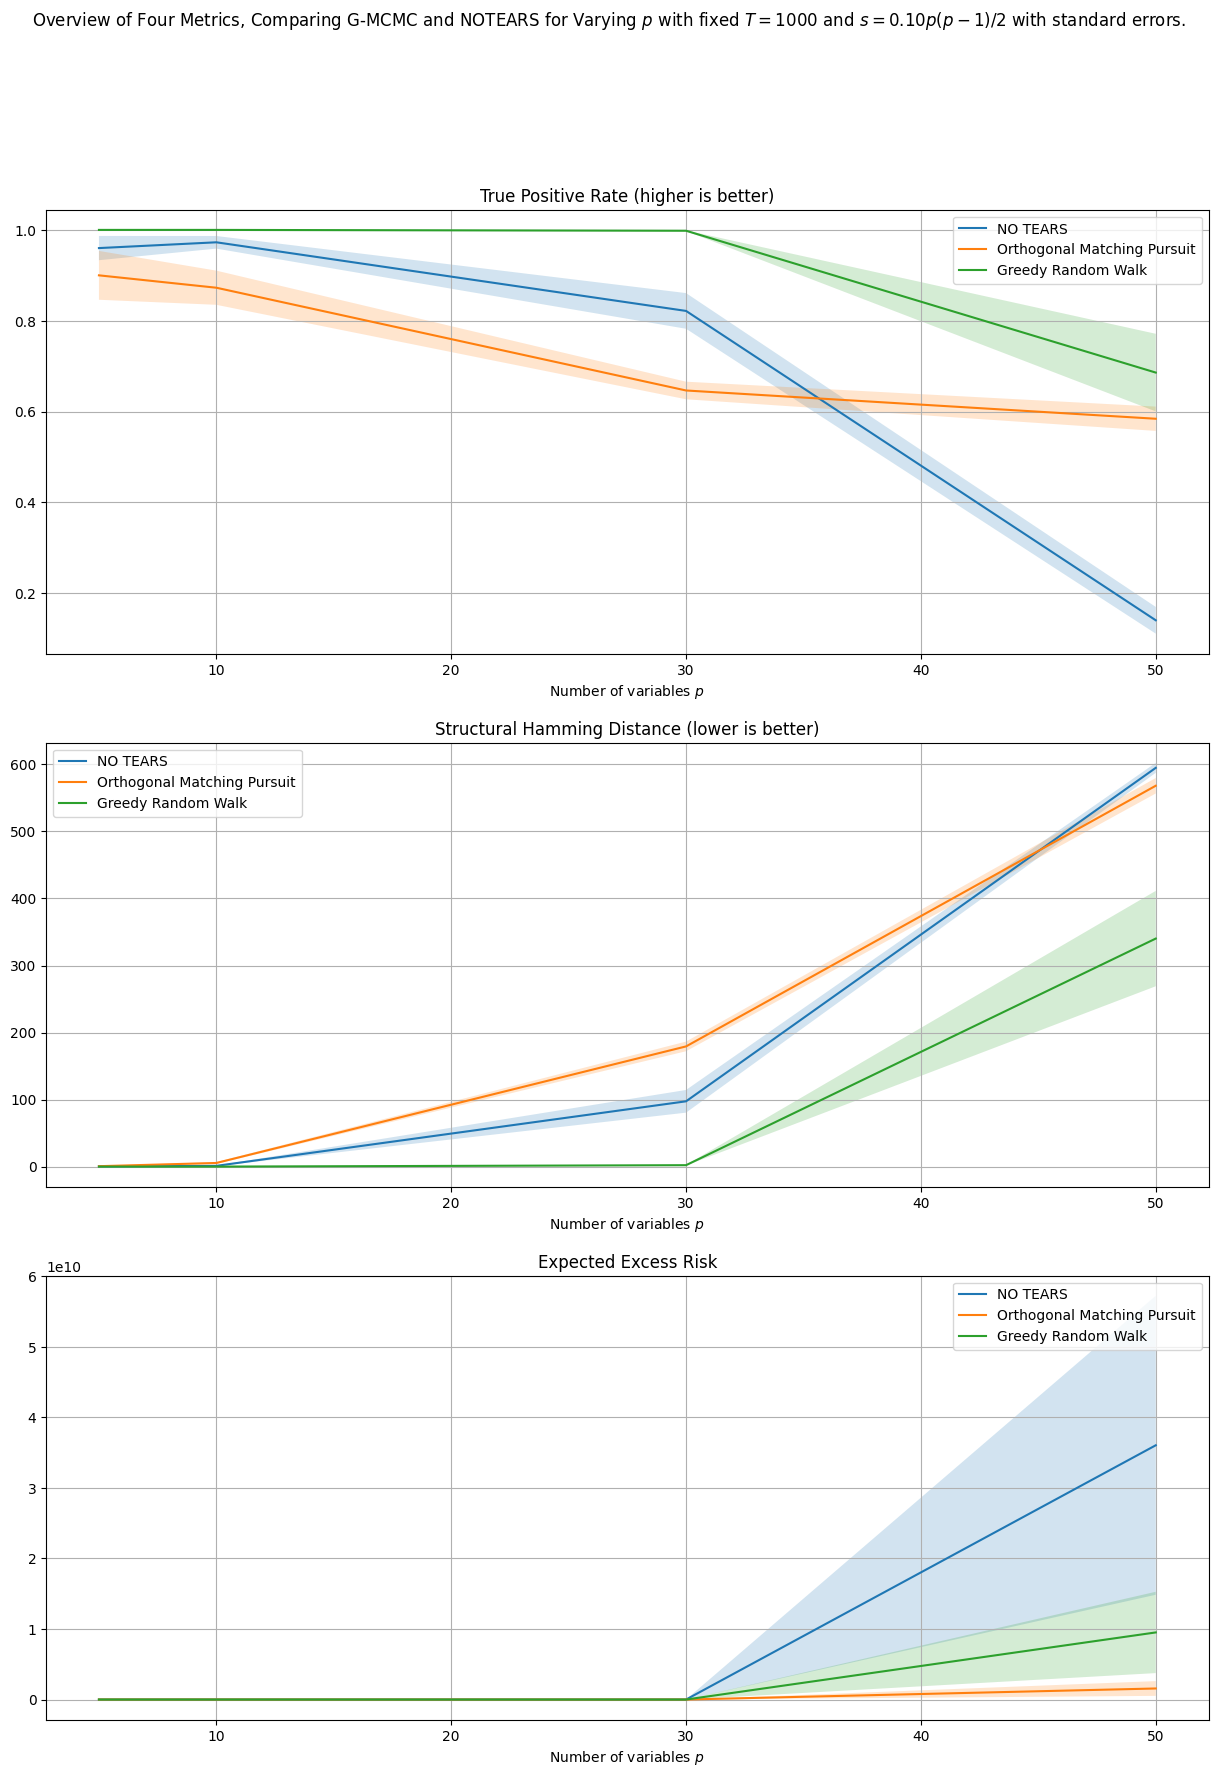

In [94]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

to_plot = [0, 2, 5]

fig, axs = plt.subplots(len(to_plot), 1, figsize = (15, 20))
fig.suptitle("Overview of Four Metrics, Comparing G-MCMC and NOTEARS for Varying $p$ with fixed $T = 1000$ and $s = 0.10 p (p - 1) / 2$ with standard errors.")
titles = ['True Positive Rate (higher is better)', 'False Prediction Rate (lower is better)', 'Structural Hamming Distance (lower is better)', 'False Detection Rate (lower is better)', 'Empirical Risk', 'Expected Excess Risk']
Ps = [5, 10, 30, 50]

for j, i in enumerate(to_plot):
    print(i % 3, i // 3)
    axs[j % len(to_plot)].grid(visible = True)
    axs[j % len(to_plot)].plot(Ps, results_notears_mean[i] - np.array(Ps) * (i == 5), label = "NO TEARS")
    axs[j % len(to_plot)].fill_between(Ps, np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_notears_sem[i]), np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_notears_sem[i]), alpha = 0.2)

    axs[j % len(to_plot)].plot(Ps, results_omp_mean[i] - np.array(Ps) * (i == 5), label = "Orthogonal Matching Pursuit")
    axs[j % len(to_plot)].fill_between(Ps, np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_omp_sem[i]), np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_omp_sem[i]), alpha = 0.2)

    axs[j % len(to_plot)].plot(Ps, results_mcmc_mean[i] - np.array(Ps) * (i == 5), label = "Greedy Random Walk")
    axs[j % len(to_plot)].fill_between(Ps, np.array(results_mcmc_mean)[i, :] - np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), np.array(results_mcmc_mean)[i, :] + np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), alpha = 0.2)    
    axs[j % len(to_plot)].set_title(titles[i])
    
    axs[j % len(to_plot)].legend()
    
for ax in axs.flat:
    ax.set(xlabel='Number of variables $p$', ylabel='')

0 0
1 0
2 0
0 1
1 1
2 1


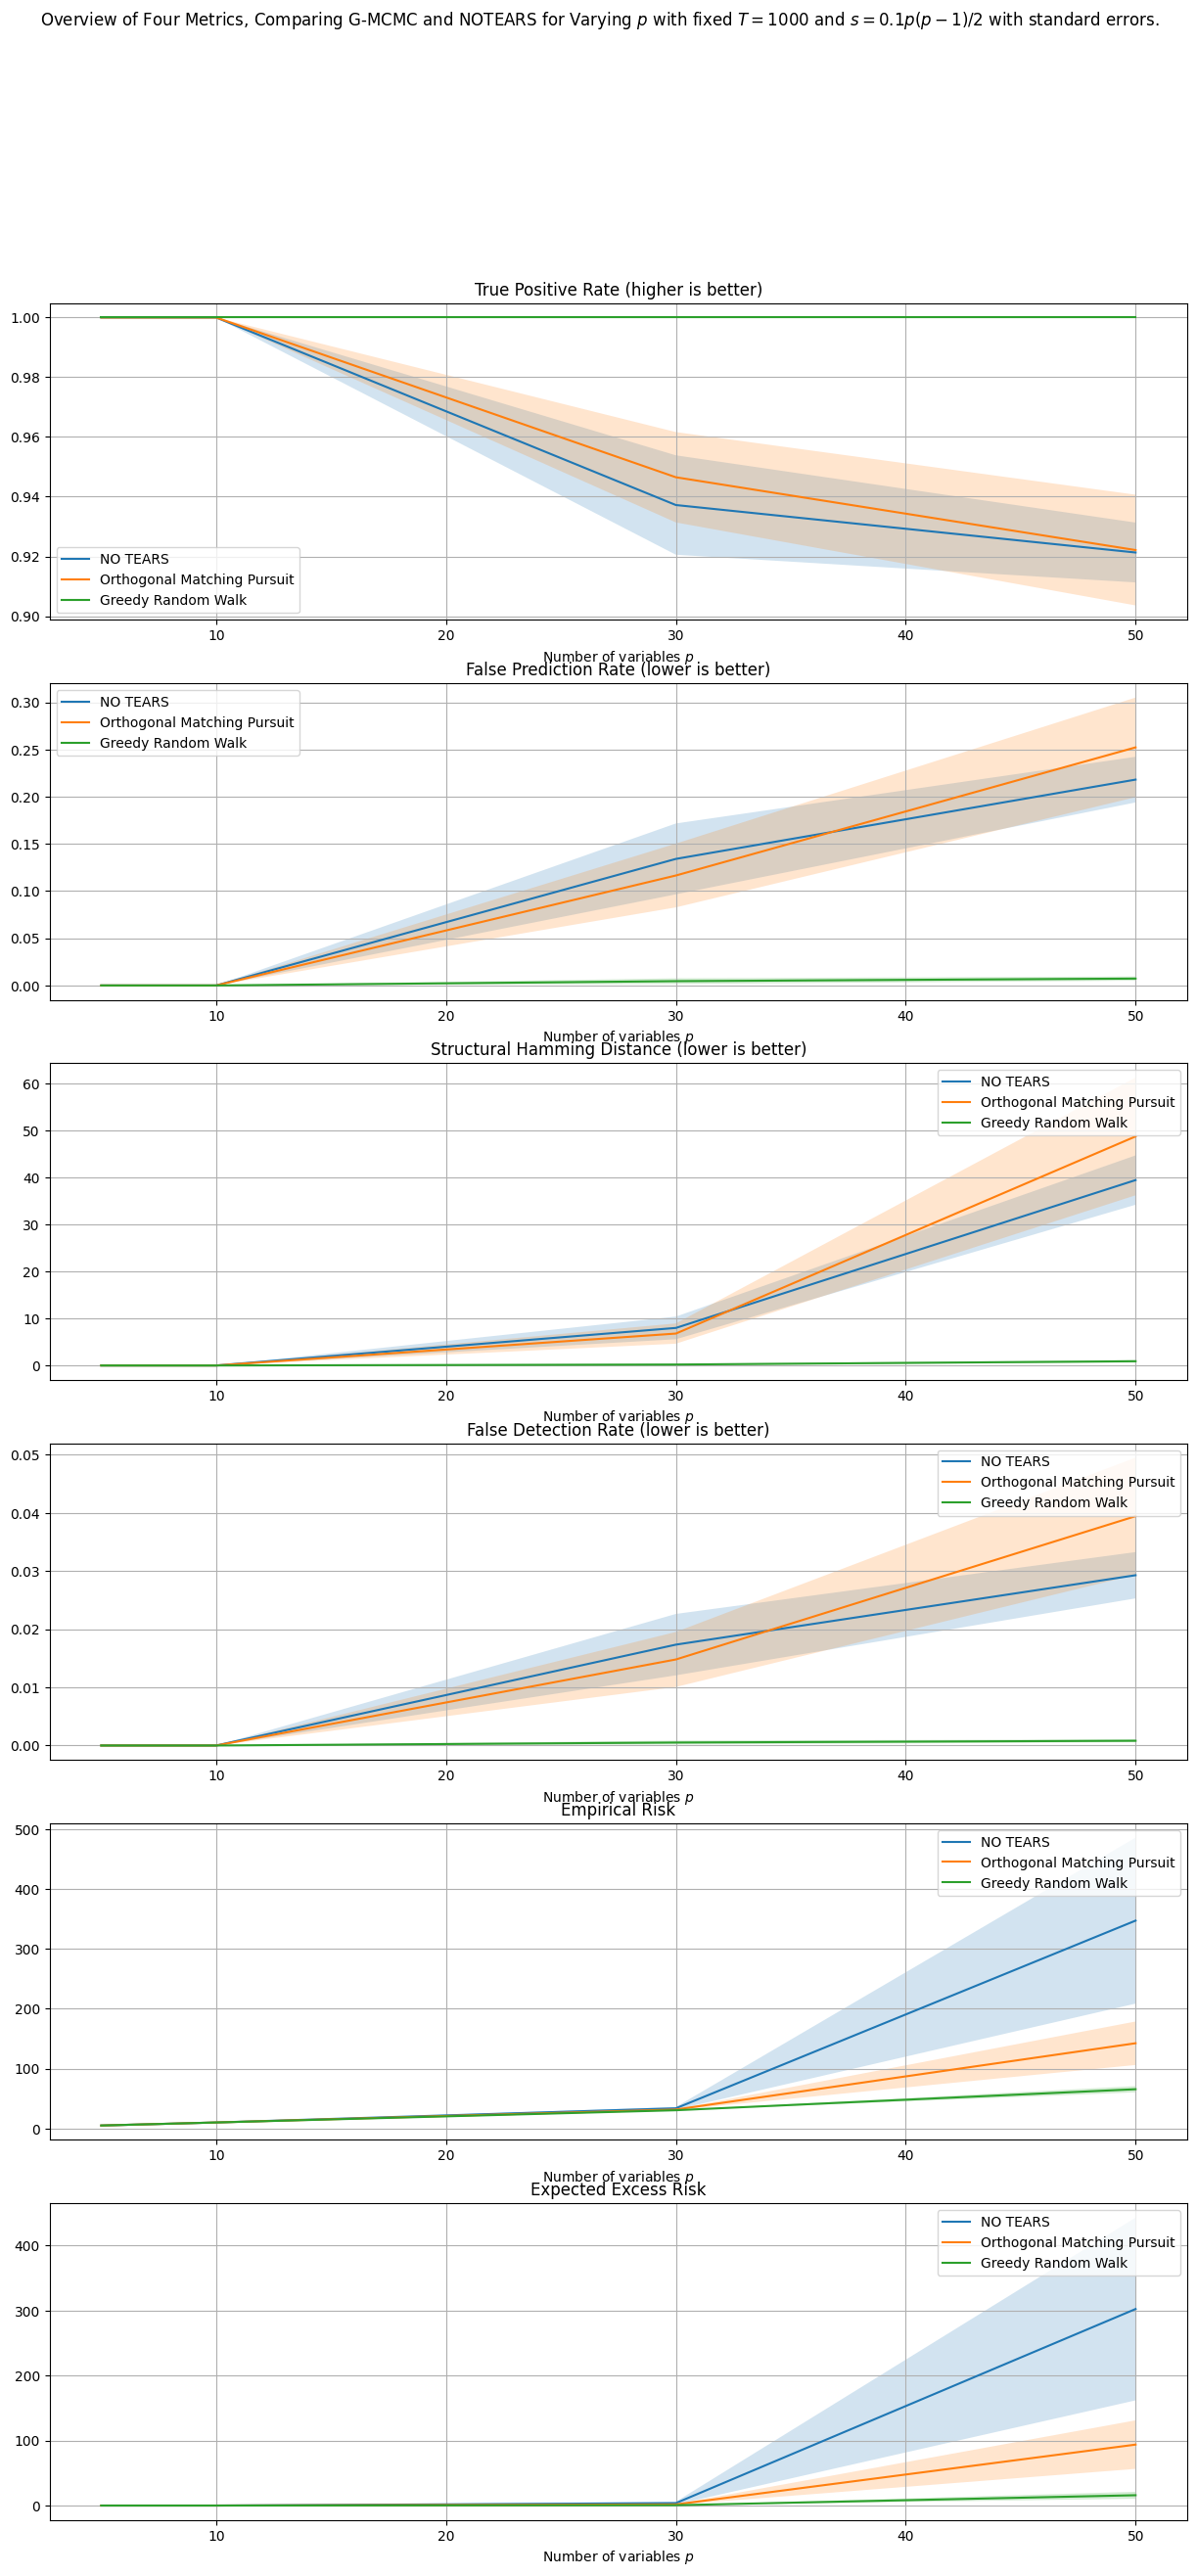

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

fig, axs = plt.subplots(6, 1, figsize = (15, 30))
fig.suptitle("Overview of Four Metrics, Comparing G-MCMC and NOTEARS for Varying $p$ with fixed $T = 1000$ and $s = 0.1 p (p - 1) / 2$ with standard errors.")
titles = ['True Positive Rate (higher is better)', 'False Prediction Rate (lower is better)', 'Structural Hamming Distance (lower is better)', 'False Detection Rate (lower is better)', 'Empirical Risk', 'Expected Excess Risk']
Ps = [5, 10, 30, 50]

for i in range(6):
    print(i % 3, i // 3)
    axs[i % 6].grid(visible = True)
    axs[i % 6].plot(Ps, results_notears_mean[i] - np.array(Ps) * (i == 5), label = "NO TEARS")
    axs[i % 6].fill_between(Ps, np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_notears_sem[i]), np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_notears_sem[i]), alpha = 0.2)

    axs[i % 6].plot(Ps, results_omp_mean[i] - np.array(Ps) * (i == 5), label = "Orthogonal Matching Pursuit")
    axs[i % 6].fill_between(Ps, np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_omp_sem[i]), np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_omp_sem[i]), alpha = 0.2)

    axs[i % 6].plot(Ps, results_mcmc_mean[i] - np.array(Ps) * (i == 5), label = "Greedy Random Walk")
    axs[i % 6].fill_between(Ps, np.array(results_mcmc_mean)[i, :] - np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), np.array(results_mcmc_mean)[i, :] + np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), alpha = 0.2)    
    axs[i % 6].set_title(titles[i])
    
    axs[i % 6].legend()
    
for ax in axs.flat:
    ax.set(xlabel='Number of variables $p$', ylabel='')

0 0


ValueError: operands could not be broadcast together with shapes (4,) (8,) 

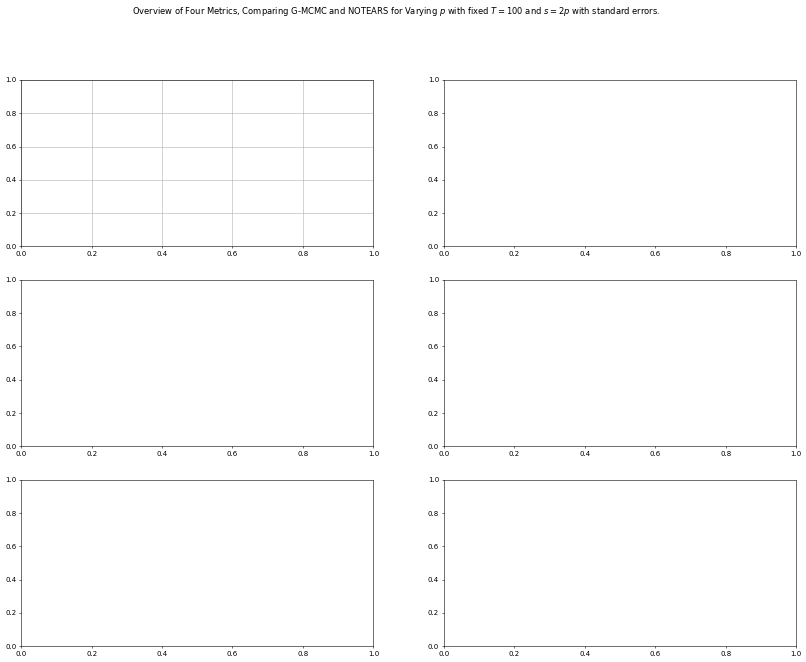

In [13]:
fig, axs = plt.subplots(3, 2, figsize = (20, 15))
fig.suptitle("Overview of Four Metrics, Comparing G-MCMC and NOTEARS for Varying $p$ with fixed $T = 100$ and $s = 2p$ with standard errors.")
titles = ['True Positive Rate (higher is better)', 'False Prediction Rate (lower is better)', 'Structural Hamming Distance (lower is better)', 'False Detection Rate (lower is better)', 'Empirical Risk', 'Expected Excess Risk']
Ps = [5, 10, 20, 30, 40, 50, 75, 100]

for i in range(6):
    print(i % 3, i // 3)
    axs[i % 3, i // 3].grid(visible = True)
    axs[i % 3, i // 3].plot(Ps, results_notears_mean[i] - np.array(Ps) * (i == 5), label = "NO TEARS")
    axs[i % 3, i // 3].fill_between(Ps, np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_notears_sem[i]), np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_notears_sem[i]), alpha = 0.2)

    axs[i % 3, i // 3].plot(Ps, results_omp_mean[i] - np.array(Ps) * (i == 5), label = "Orthogonal Matching Pursuit")
    axs[i % 3, i // 3].fill_between(Ps, np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_omp_sem[i]), np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_omp_sem[i]), alpha = 0.2)

    axs[i % 3, i // 3].plot(Ps, results_mcmc_mean[i] - np.array(Ps) * (i == 5), label = "Greedy Random Walk")
    axs[i % 3, i // 3].fill_between(Ps, np.array(results_mcmc_mean)[i, :] - np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), np.array(results_mcmc_mean)[i, :] + np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), alpha = 0.2)    
    axs[i % 3, i // 3].set_title(titles[i])
    
    axs[i % 3, i // 3].legend()
    
for ax in axs.flat:
    ax.set(xlabel='Number of variables $p$', ylabel='')

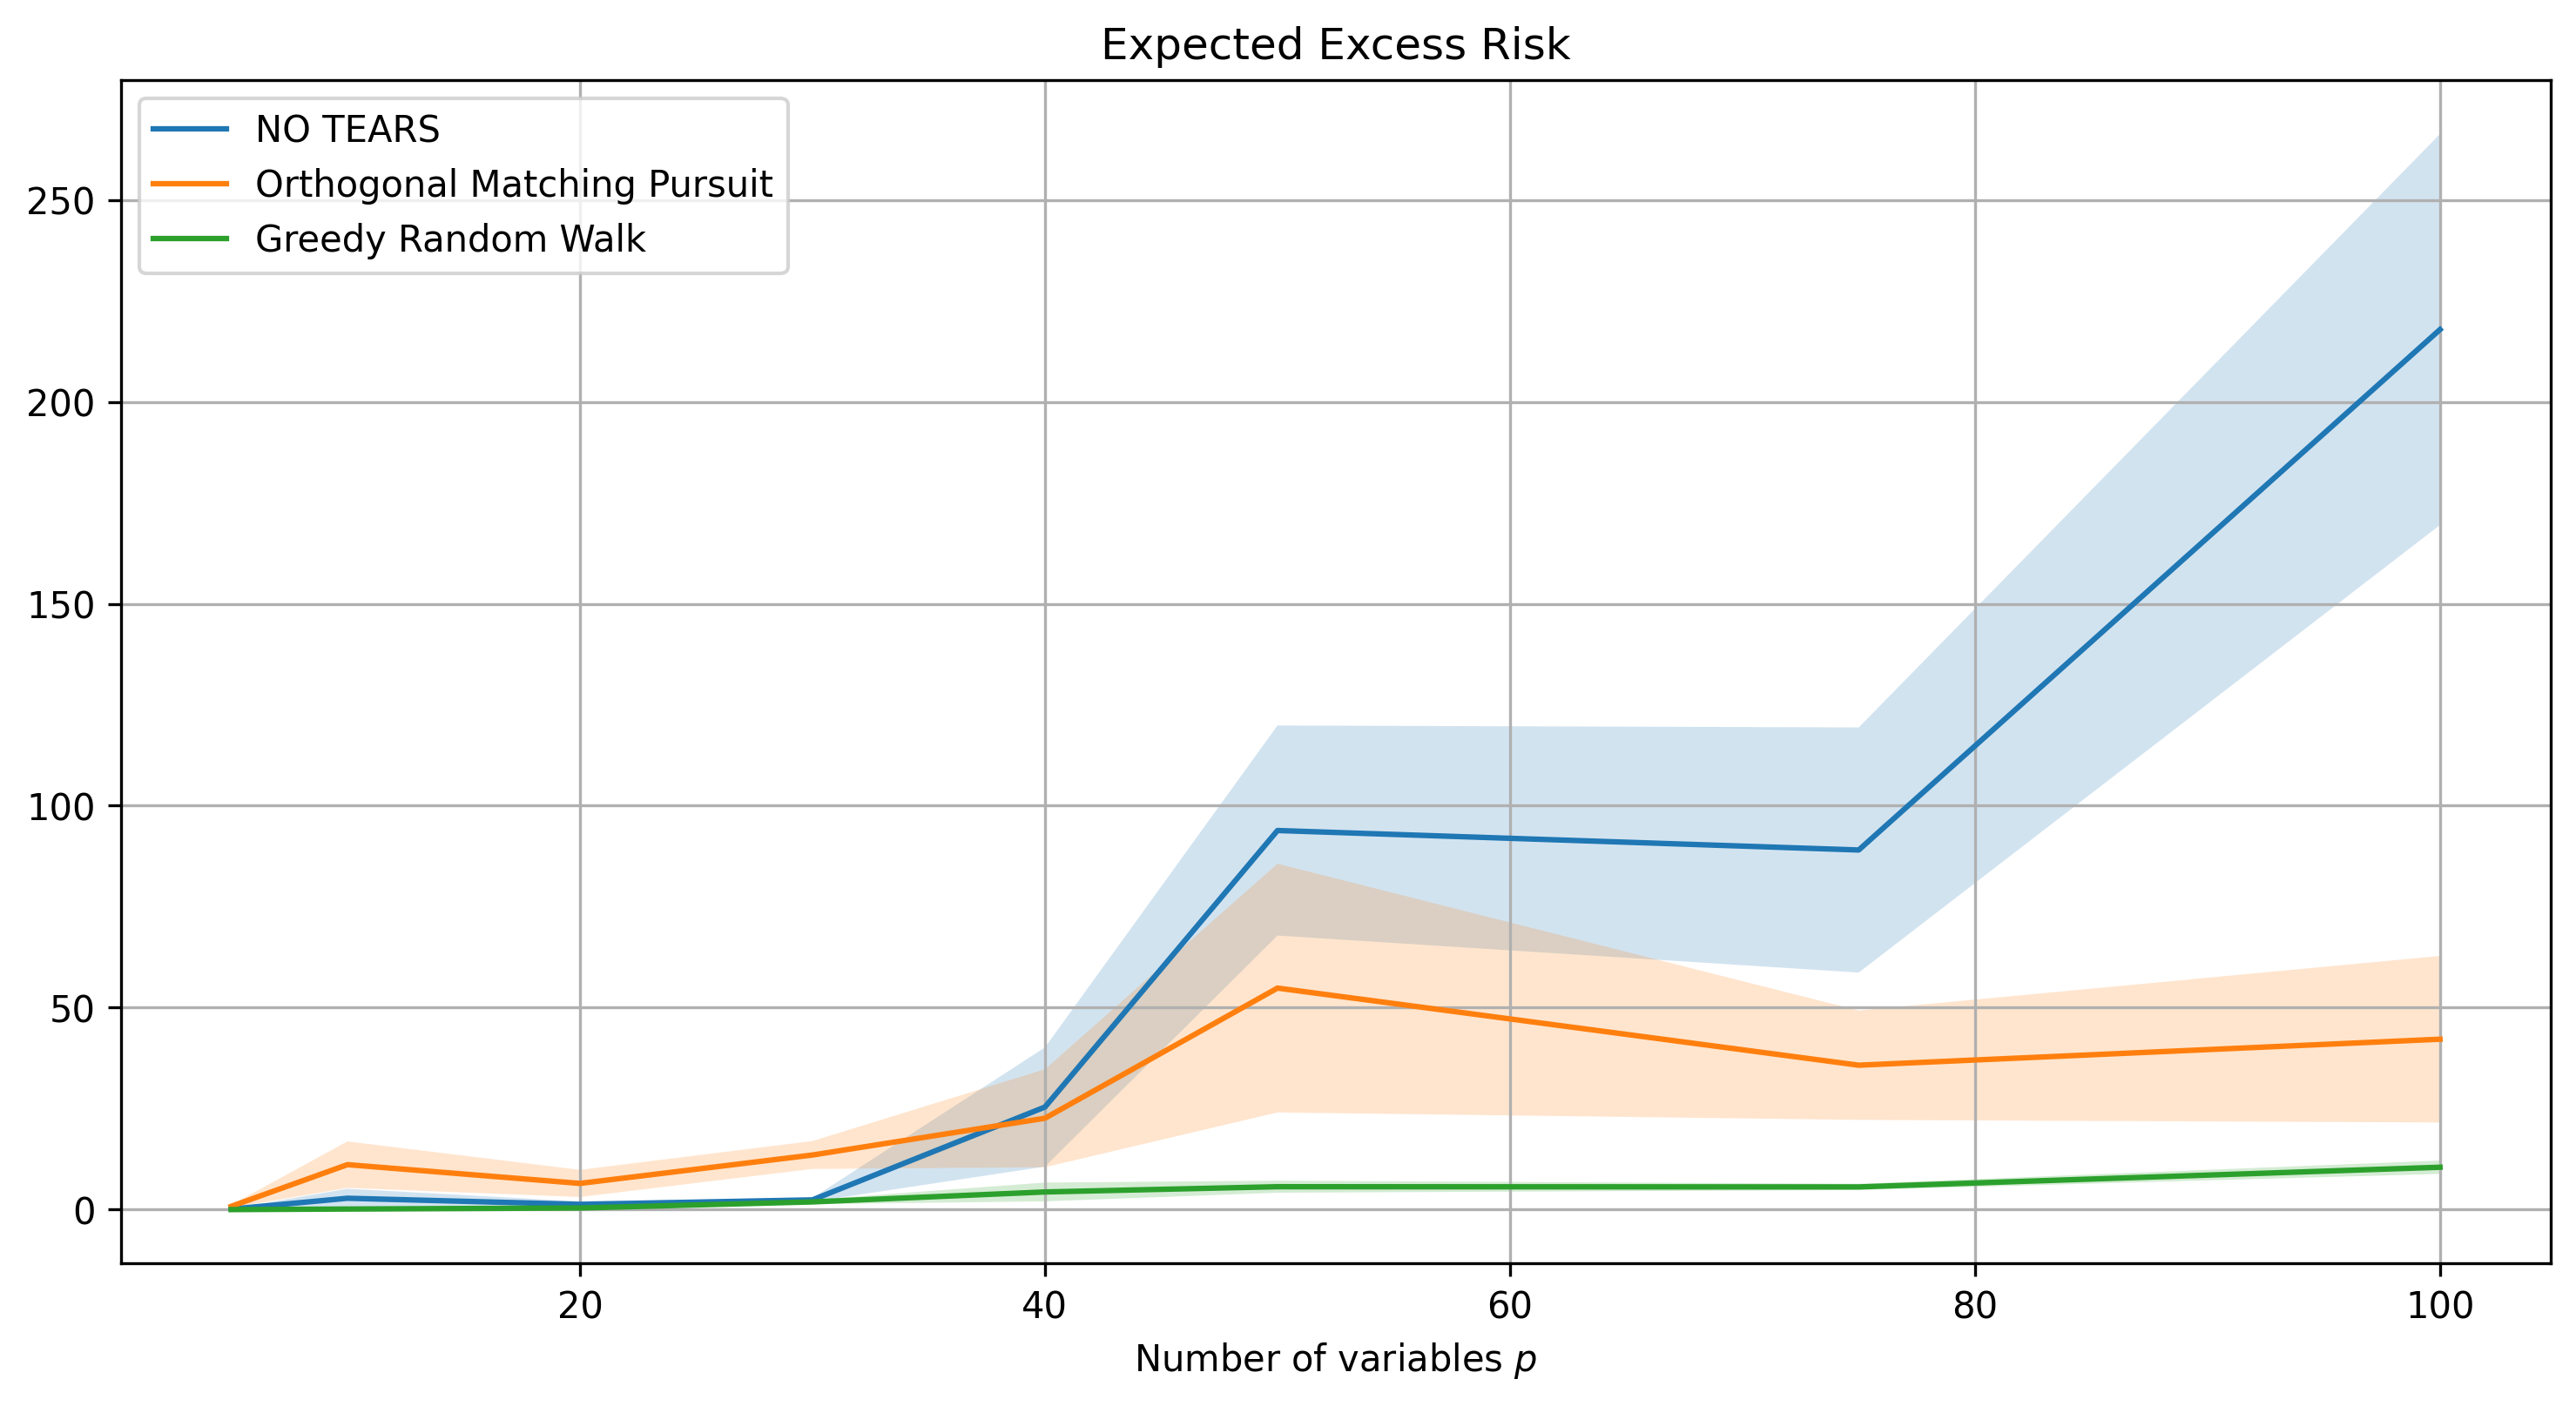

In [102]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

i = 5
plt.figure(figsize = (12, 6))
plt.grid(visible = True)
plt.plot(Ps, results_notears_mean[i] - np.array(Ps) * (i == 5), label = "NO TEARS")
plt.fill_between(Ps, np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_notears_sem[i]), np.array(results_notears_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_notears_sem[i]), alpha = 0.2)

plt.plot(Ps, results_omp_mean[i] - np.array(Ps) * (i == 5), label = "Orthogonal Matching Pursuit")
plt.fill_between(Ps, np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) - np.array(results_omp_sem[i]), np.array(results_omp_mean[i]) - np.array(Ps) * (i == 5) + np.array(results_omp_sem[i]), alpha = 0.2)

plt.plot(Ps, results_mcmc_mean[i] - np.array(Ps) * (i == 5), label = "Greedy Random Walk")
plt.fill_between(Ps, np.array(results_mcmc_mean)[i, :] - np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), np.array(results_mcmc_mean)[i, :] + np.array(results_mcmc_sem)[i, :] - np.array(Ps) * (i == 5), alpha = 0.2)  
plt.title("Expected Excess Risk")
plt.xlabel(r"Number of variables $p$")
plt.legend(loc = 2)